# Outlier detection with DBSCAN
Insert Algorithm here

## Python implemenation from lab using [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

### Imports

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler   # scales everything between 0 and 1 

### Reading data from csv into pandas Dataframe

In [18]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Histograms from dataframe
Outliers occur at the entreme ends of a normal distribution.  
In general though, plots are not normally distributed, so we have high variance.

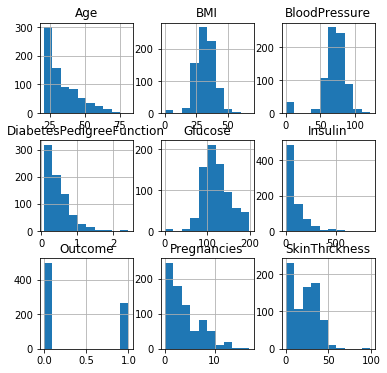

In [19]:
df.hist(figsize=(6,6))
plt.show()

### Getting values (X) and labels (y)

In [20]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

### Standardizing data with [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Standardize features by removing the mean and scaling to unit variance

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.

In [21]:
X = StandardScaler().fit_transform(X)

### Executing DBSCAN
Running DBSCAN with $\epsilon = 3$ returns 1 cluster (labelled 0) and the rest is noise

In [22]:
db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

# converting to pandas dataframe
print(pd.Series(labels).value_counts())

 0    755
-1     13
dtype: int64


### Visualizing Cluster(s) and Noise wrt BMI vs Glucose

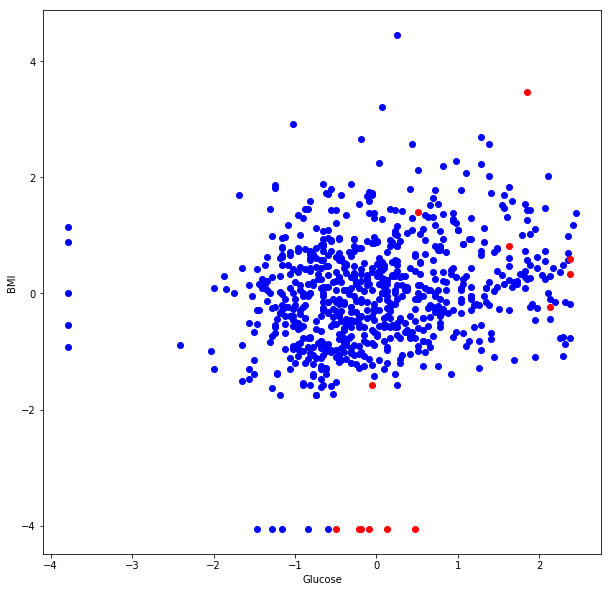

In [23]:
plt.figure(figsize=(10, 10))
unique_labels = set(labels)
colors = ['blue', 'red']

for color, label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,1][sample_mask], X[:,5][sample_mask], 'o', color=color)
    
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()